Problem Statement:
    I am going to predict the season when avacodo price goes higher using Facebook's Prophet dataset

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

Loading the dataset

In [2]:
avocado=pd.read_csv('avocado.csv')

Getting the shape of the dataset and it was found to be 18249 * 2

In [3]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
avocado.shape

(18249, 14)

Visualising the dataset using heatmap and finding correlelation existed among various columns

<AxesSubplot:>

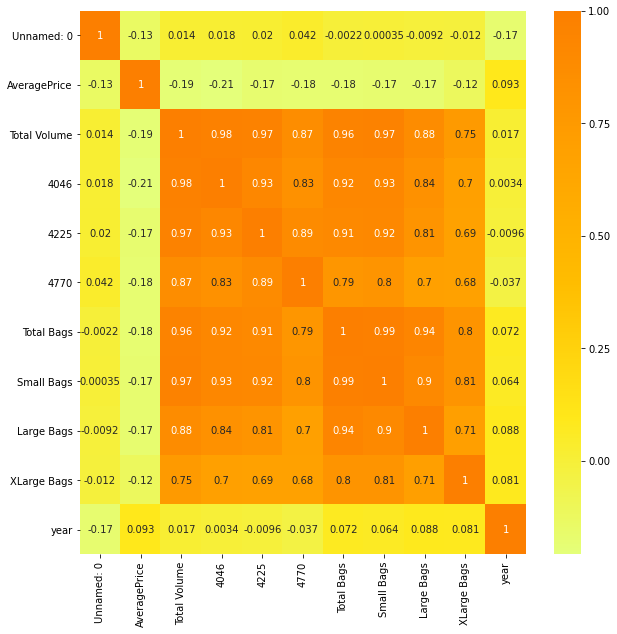

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(avocado.corr(),cmap='Wistia',annot=True)

In [7]:
avocado.shape

(18249, 14)

Checking if any non null values present in the dataset

In [8]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Plotting a graph between date and averageprice

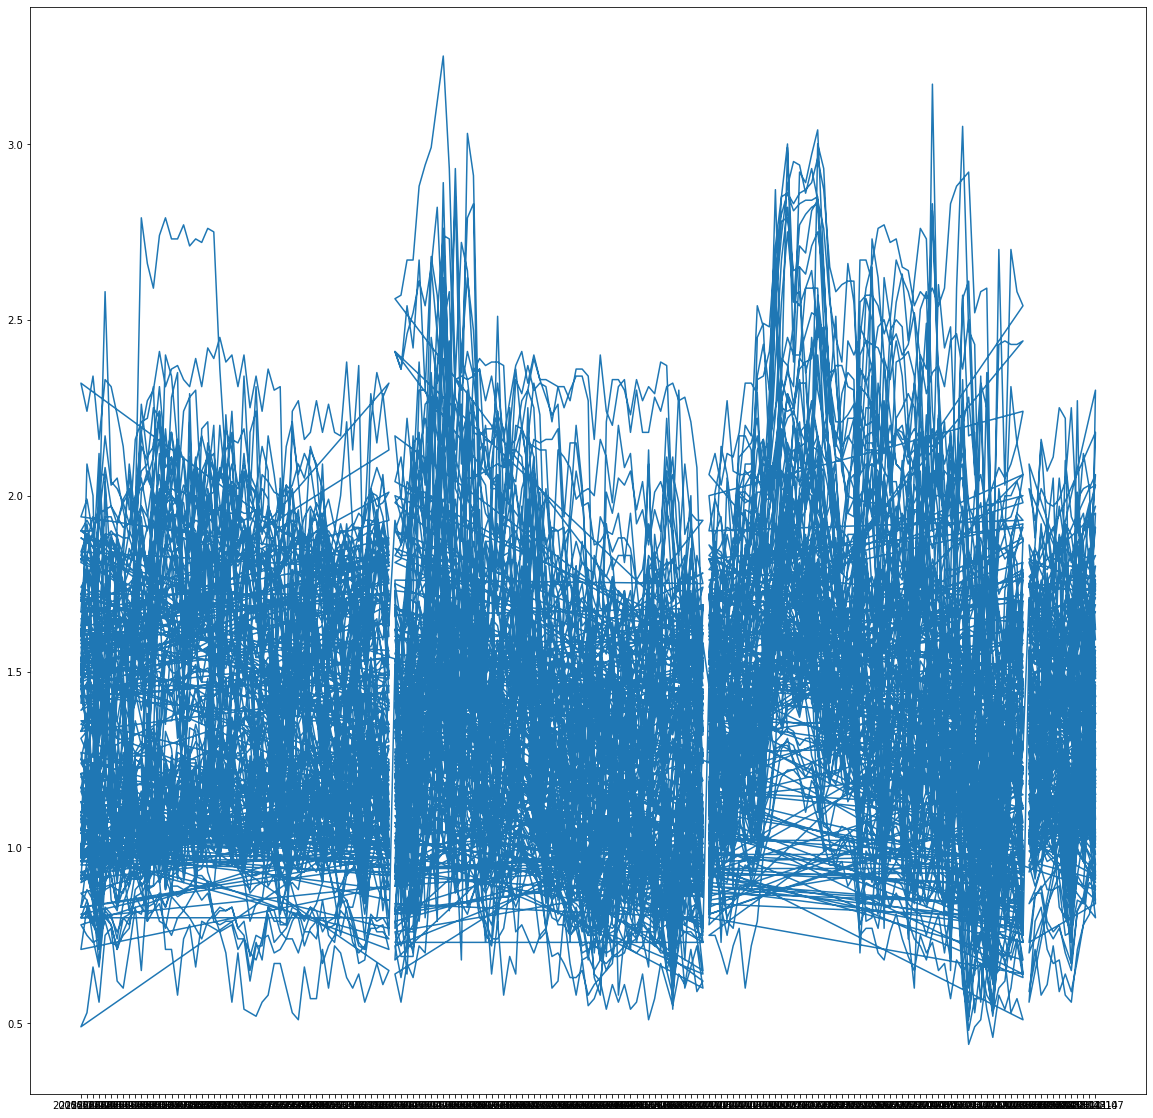

In [9]:
plt.figure(figsize=(20,20))
plt.plot(avocado['Date'],avocado['AveragePrice'])

Plotting a graph to find the year in which avacado is sold more.Since the data for 2018 is only till july month, it seems to be imbalanced 

<AxesSubplot:xlabel='year', ylabel='count'>

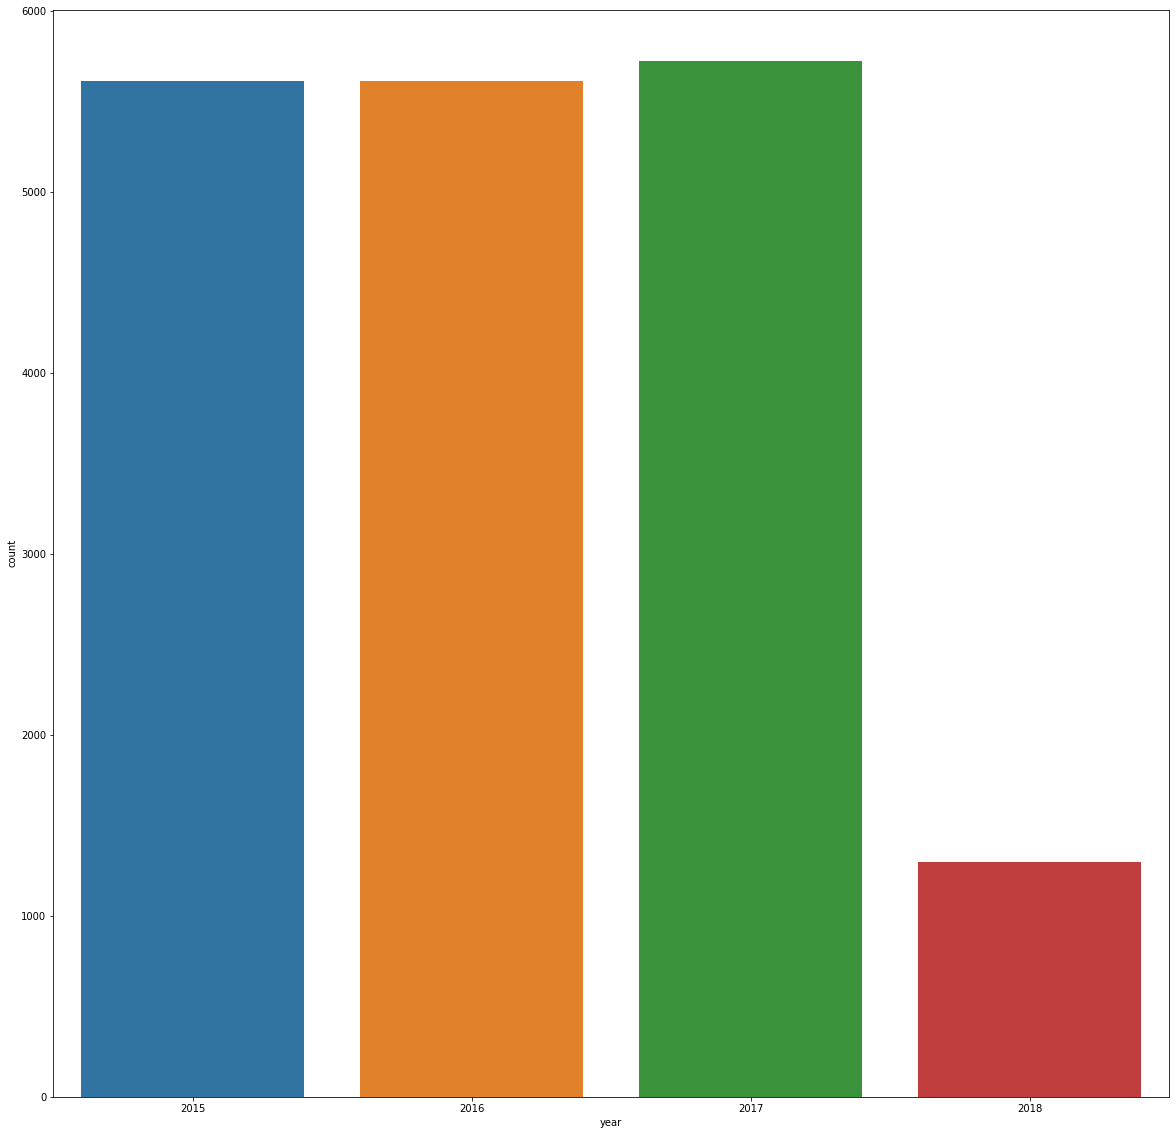

In [10]:
plt.figure(figsize=(20,20))
sns.countplot(avocado['year'])

In [11]:
avocado['region'].value_counts().index

Index(['NewYork', 'Syracuse', 'West', 'BuffaloRochester', 'Jacksonville',
       'Chicago', 'Plains', 'SanDiego', 'Nashville', 'California',
       'HarrisburgScranton', 'Seattle', 'CincinnatiDayton', 'DallasFtWorth',
       'Philadelphia', 'Northeast', 'Portland', 'Boise', 'Atlanta',
       'Pittsburgh', 'Sacramento', 'BaltimoreWashington', 'GreatLakes',
       'NorthernNewEngland', 'MiamiFtLauderdale', 'Tampa', 'Boston', 'Denver',
       'Louisville', 'Houston', 'PhoenixTucson', 'TotalUS', 'SouthCarolina',
       'Spokane', 'NewOrleansMobile', 'Midsouth', 'RichmondNorfolk', 'Orlando',
       'LosAngeles', 'Detroit', 'Columbus', 'Roanoke', 'Indianapolis',
       'StLouis', 'Albany', 'SouthCentral', 'GrandRapids', 'LasVegas',
       'Charlotte', 'RaleighGreensboro', 'SanFrancisco', 'HartfordSpringfield',
       'Southeast', 'WestTexNewMexico'],
      dtype='object')

Regionwise sales of avocado 

<AxesSubplot:xlabel='region', ylabel='count'>

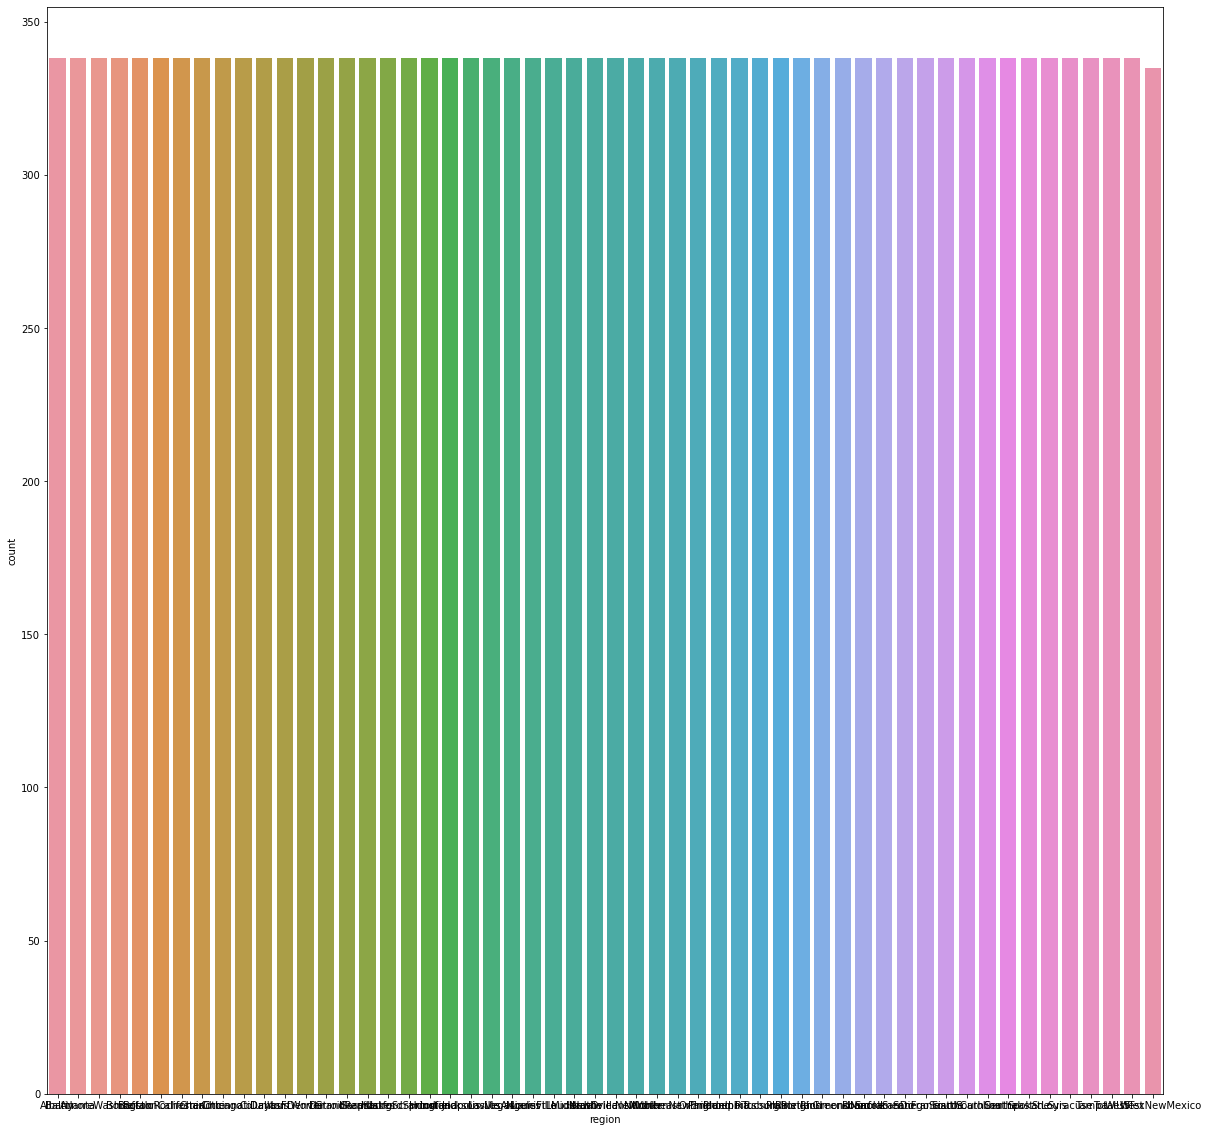

In [12]:
plt.figure(figsize=(20,20))
sns.countplot(x='region',data=avocado)


Getting date and average price column as avocado_prophet

In [13]:
avocado_prophet=avocado['Date'].sort_values()
avocado_prophet=avocado[['Date','AveragePrice']]

In [14]:
avocado_prophet.shape

(18249, 2)

In [15]:
avocado_prophet

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


Renaming the columns date as ds and averageprice as y

In [16]:
avocado_prophet=avocado_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})

In [17]:
avocado_prophet

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


Loading Facebook's Prophet dateset

In [18]:
from fbprophet import Prophet
m=Prophet()
m.fit(avocado_prophet)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Calculating future prices for next two years in overall all regions

In [19]:
future=m.make_future_dataframe(periods=720)
forecast=m.predict(future)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.501341,0.885611,1.832727,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
1,2015-01-04,1.501341,0.884857,1.876003,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
2,2015-01-04,1.501341,0.904016,1.862554,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
3,2015-01-04,1.501341,0.864670,1.863104,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
4,2015-01-04,1.501341,0.905394,1.882668,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18964,2020-03-10,0.899414,0.054928,1.613627,0.310560,1.513255,-0.090534,-0.090534,-0.090534,-0.090534,-0.090534,-0.090534,0.0,0.0,0.0,0.808881
18965,2020-03-11,0.898677,0.037017,1.595792,0.308993,1.514005,-0.090777,-0.090777,-0.090777,-0.090777,-0.090777,-0.090777,0.0,0.0,0.0,0.807900
18966,2020-03-12,0.897939,0.039420,1.602492,0.307426,1.514885,-0.091005,-0.091005,-0.091005,-0.091005,-0.091005,-0.091005,0.0,0.0,0.0,0.806934
18967,2020-03-13,0.897201,0.070270,1.582635,0.305884,1.515655,-0.091162,-0.091162,-0.091162,-0.091162,-0.091162,-0.091162,0.0,0.0,0.0,0.806039


By considering overall regions the avocado price got reduced from 1.4 units in dollars to 0.89 unit in dollars

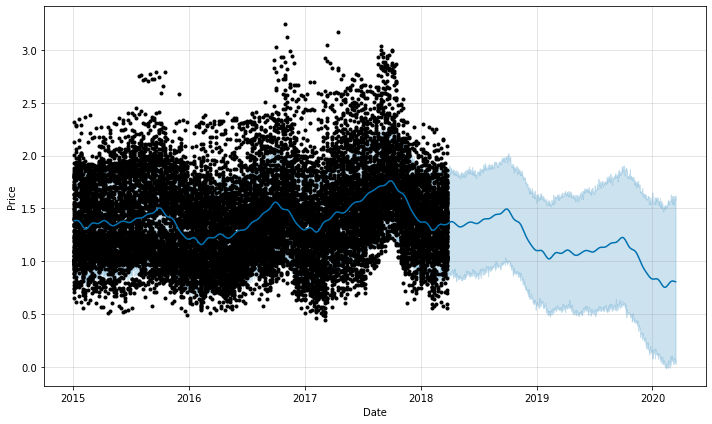

In [21]:
fig=m.plot(forecast,xlabel='Date',ylabel='Price')

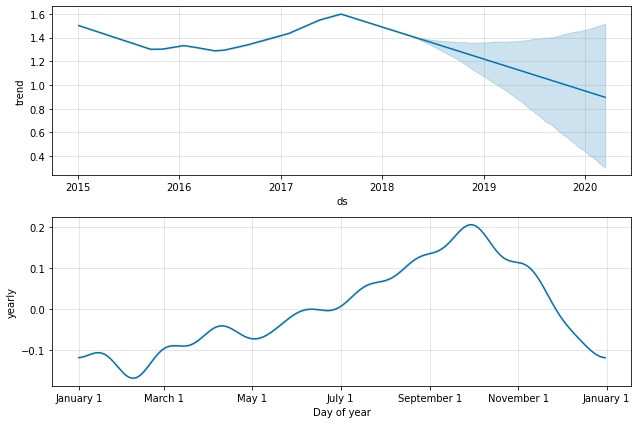

In [22]:
fig=m.plot_components(forecast)

Calculating future avocado price for next two years for the West region

In [23]:
avocado_West=avocado[avocado['region']=='West']
avocado_West

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


Getting averageprice for next two years and it is increased fromm 1.1 to 1.6 units in dollars. Simply we multipy number of avocado sold with 1.6 to find the total price we earned in West region

In [24]:
avocado_West=avocado_West.sort_values('Date')
avocado_West=avocado_West[['Date','AveragePrice']]
avocado_West

,Date,AveragePrice
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
...,...,...
18227,2018-03-11,1.63
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [25]:
avocado_West=avocado_West.rename(columns={'Date':'ds','AveragePrice':'y'})

In [26]:
avocado_West

,ds,y
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
...,...,...
18227,2018-03-11,1.63
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [27]:
m=Prophet()
m.fit(avocado_West)
future_West=m.make_future_dataframe(periods=720)
forecast_West=m.predict(future_West)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


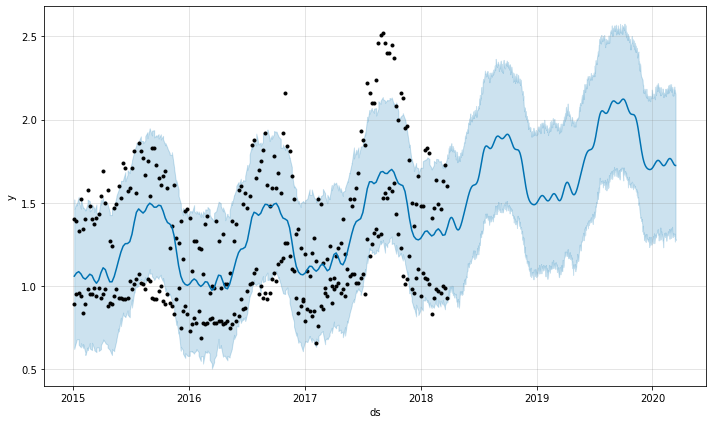

In [28]:
West=m.plot(forecast_West)

In [29]:
forecast_West

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.244756,0.624735,1.519663,1.244756,1.244756,-0.184901,-0.184901,-0.184901,-0.184901,-0.184901,-0.184901,0.0,0.0,0.0,1.059854
1,2015-01-04,1.244756,0.627875,1.463714,1.244756,1.244756,-0.184901,-0.184901,-0.184901,-0.184901,-0.184901,-0.184901,0.0,0.0,0.0,1.059854
2,2015-01-11,1.243912,0.671756,1.494974,1.243912,1.243912,-0.165316,-0.165316,-0.165316,-0.165316,-0.165316,-0.165316,0.0,0.0,0.0,1.078596
3,2015-01-11,1.243912,0.678403,1.484180,1.243912,1.243912,-0.165316,-0.165316,-0.165316,-0.165316,-0.165316,-0.165316,0.0,0.0,0.0,1.078596
4,2015-01-18,1.243069,0.682281,1.536139,1.243069,1.243069,-0.156128,-0.156128,-0.156128,-0.156128,-0.156128,-0.156128,0.0,0.0,0.0,1.086941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,2020-03-10,1.940874,1.316534,2.198167,1.862172,2.022479,-0.212249,-0.212249,-0.212249,-0.212249,-0.212249,-0.212249,0.0,0.0,0.0,1.728624
1054,2020-03-11,1.941452,1.310397,2.158071,1.862591,2.023215,-0.214978,-0.214978,-0.214978,-0.214978,-0.214978,-0.214978,0.0,0.0,0.0,1.726474
1055,2020-03-12,1.942030,1.267375,2.179715,1.863049,2.023960,-0.217079,-0.217079,-0.217079,-0.217079,-0.217079,-0.217079,0.0,0.0,0.0,1.724951
1056,2020-03-13,1.942608,1.284951,2.163111,1.863509,2.024705,-0.218474,-0.218474,-0.218474,-0.218474,-0.218474,-0.218474,0.0,0.0,0.0,1.724133


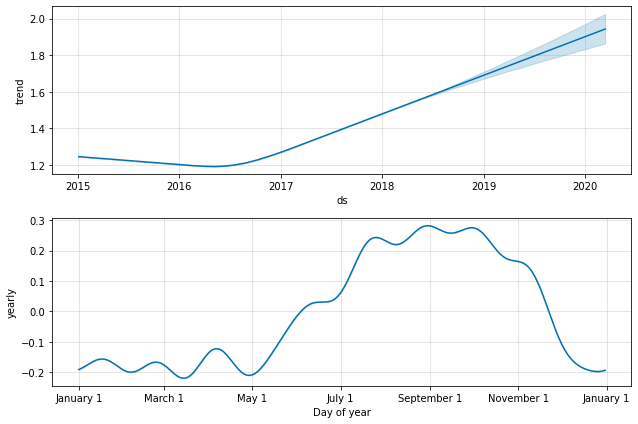

In [30]:
West=m.plot_components(forecast_West)

Calculating avocado price in California

In [31]:
California=avocado[avocado['region']=='California']
California

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
312,0,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California
313,1,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California
314,2,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California
315,3,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California
316,4,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,7,2018-02-04,1.56,188212.98,38078.53,60551.97,0.00,89582.48,89527.66,54.82,0.00,organic,2018,California
17681,8,2018-01-28,1.87,170998.81,30070.62,58357.89,0.00,82570.30,82563.11,7.19,0.00,organic,2018,California
17682,9,2018-01-21,1.69,181974.98,34411.37,64513.67,0.00,83049.94,83022.84,27.10,0.00,organic,2018,California
17683,10,2018-01-14,1.61,216681.04,52253.40,95353.95,0.00,69073.69,69054.51,19.18,0.00,organic,2018,California


In [32]:
California.shape

(338, 14)

In [33]:
California=avocado['Date'].sort_values()
California=avocado[['Date','AveragePrice']]
California=California.rename(columns={'Date':'ds','AveragePrice':'y'})
California

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


Avocado Price is calculated in california for the next two years

In [34]:
m=Prophet()
m.fit(California)
future_california=m.make_future_dataframe(periods=720)
forecast_california=m.predict(future_california)
forecast_california


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.501341,0.885290,1.869252,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
1,2015-01-04,1.501341,0.931974,1.864423,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
2,2015-01-04,1.501341,0.847264,1.808139,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
3,2015-01-04,1.501341,0.910774,1.855890,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
4,2015-01-04,1.501341,0.921785,1.885084,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18964,2020-03-10,0.899414,0.011333,1.551929,0.332721,1.491502,-0.090534,-0.090534,-0.090534,-0.090534,-0.090534,-0.090534,0.0,0.0,0.0,0.808881
18965,2020-03-11,0.898677,0.057775,1.573104,0.330976,1.492166,-0.090777,-0.090777,-0.090777,-0.090777,-0.090777,-0.090777,0.0,0.0,0.0,0.807900
18966,2020-03-12,0.897939,0.063564,1.551177,0.329144,1.492802,-0.091005,-0.091005,-0.091005,-0.091005,-0.091005,-0.091005,0.0,0.0,0.0,0.806934
18967,2020-03-13,0.897201,0.054368,1.544474,0.326949,1.493068,-0.091162,-0.091162,-0.091162,-0.091162,-0.091162,-0.091162,0.0,0.0,0.0,0.806039


Avocado Price is reduced from 1.4 units in dollars to 0.8 units in California region

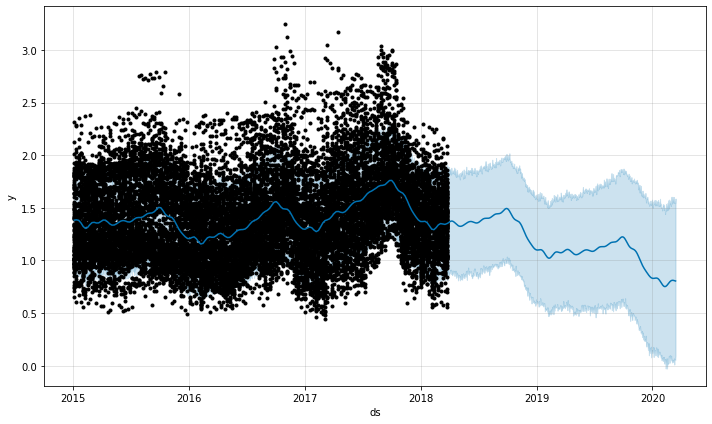

In [35]:
fig_california=m.plot(forecast_california)

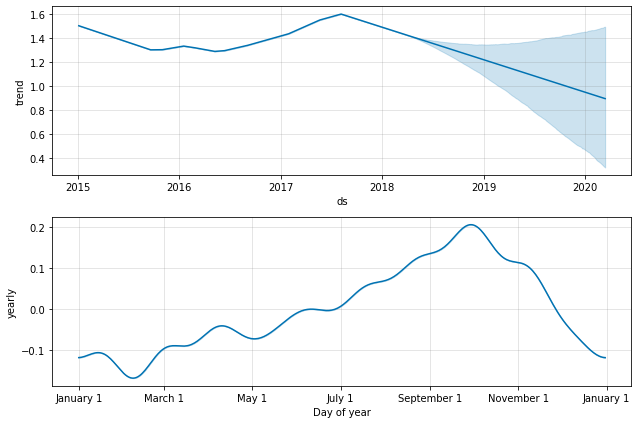

In [36]:
fig_california_components=m.plot_components(forecast_california)

Calulating avocado price for WestTexNewMexico

In [37]:
WestTexNewMexico=avocado[avocado['region']=='WestTexNewMexico']
WestTexNewMexico

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2756,0,2015-12-27,0.71,776404.39,451904.51,141599.36,15486.97,167413.55,123158.22,33065.33,11190.00,conventional,2015,WestTexNewMexico
2757,1,2015-12-20,0.83,649885.76,389110.55,108176.29,12953.59,139645.33,90392.86,23535.80,25716.67,conventional,2015,WestTexNewMexico
2758,2,2015-12-13,0.78,646041.56,437780.91,100110.13,13576.25,94574.27,83053.10,10947.84,573.33,conventional,2015,WestTexNewMexico
2759,3,2015-12-06,0.74,623231.77,398871.12,133434.18,21088.12,69838.35,68233.56,1604.79,0.00,conventional,2015,WestTexNewMexico
2760,4,2015-11-29,0.81,519028.45,335446.83,103635.94,11463.06,68482.62,67264.73,1217.89,0.00,conventional,2015,WestTexNewMexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


In [38]:
WestTexNewMexico=avocado['Date'].sort_values()
WestTexNewMexico=avocado[['Date','AveragePrice']]



In [39]:
WestTexNewMexico=WestTexNewMexico.rename(columns={'Date':'ds','AveragePrice':'y'})
WestTexNewMexico

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


Calculatin price of avocado for next two years in WestTexNewMexico

In [40]:
m=Prophet()
m.fit(WestTexNewMexico)
future_WestTexNewMexico=m.make_future_dataframe(periods=720)
forecast_WestTexNewMexico=m.predict(future_WestTexNewMexico)
forecast_WestTexNewMexico


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.501341,0.903824,1.839591,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
1,2015-01-04,1.501341,0.914914,1.845971,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
2,2015-01-04,1.501341,0.903137,1.889373,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
3,2015-01-04,1.501341,0.894744,1.859030,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
4,2015-01-04,1.501341,0.864543,1.869335,1.501341,1.501341,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,-0.117903,0.0,0.0,0.0,1.383438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18964,2020-03-10,0.899414,0.065126,1.587733,0.363340,1.500255,-0.090534,-0.090534,-0.090534,-0.090534,-0.090534,-0.090534,0.0,0.0,0.0,0.808881
18965,2020-03-11,0.898677,0.014354,1.642982,0.360631,1.500660,-0.090777,-0.090777,-0.090777,-0.090777,-0.090777,-0.090777,0.0,0.0,0.0,0.807900
18966,2020-03-12,0.897939,0.035567,1.604555,0.357923,1.501064,-0.091005,-0.091005,-0.091005,-0.091005,-0.091005,-0.091005,0.0,0.0,0.0,0.806934
18967,2020-03-13,0.897201,0.039450,1.636679,0.355214,1.501469,-0.091162,-0.091162,-0.091162,-0.091162,-0.091162,-0.091162,0.0,0.0,0.0,0.806039


Avocado Price in WestTexNewMexico is found to be reduced from 1.4 units in dollars to 0.7 units in dollars

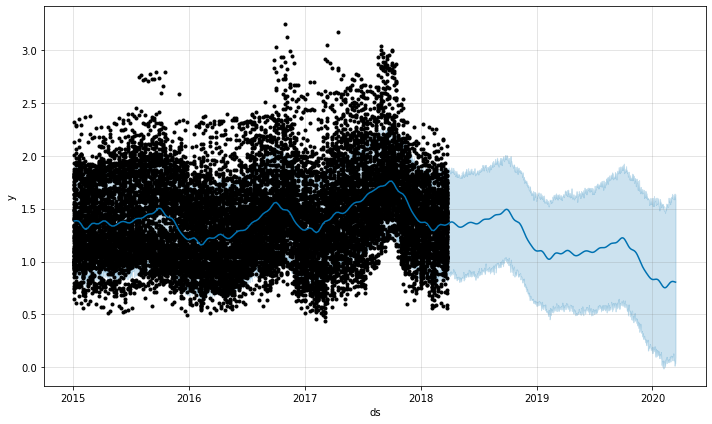

In [41]:
figure_WestTexNewMexico=m.plot(forecast_WestTexNewMexico)

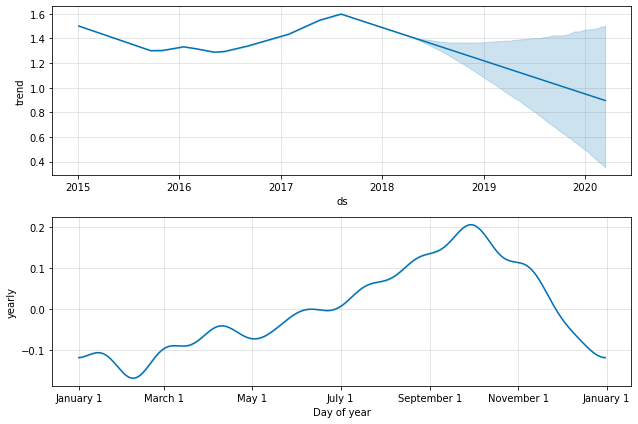

In [42]:
fig_WestTexNewMexico_components=m.plot_components(forecast_WestTexNewMexico)